##### Exploratory Data Analysis - Case Study (Superstore Sales Data)

In [1]:
# Import the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
# Import the dataset & Saving 
df = pd.read_csv("E:/1. University Teaching Data/9. PU-CSAS/2. Python Programming for Data Analysis/7. EDA Case Study (Super Store Sales Data)/Superstore Sales.csv")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [33]:
# Get the summary of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

##### Data Cleaning & Wrangling

In [3]:
# Finding the number of null values in postal code column  
null_count = df['Postal Code'].isnull().sum()
null_count

11

In [4]:
# Filling null values  
df["Postal Code"].fillna(0, inplace = True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
# Convert the Postal Code variable into Integer
df['Postal Code'] = df['Postal Code'].astype(int) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
# Checking for duplicates 
if df.duplicated().sum() > 0:  
    print("Duplicates exist in the Data Set")
else:
    print("No duplicates found in the Data Set")

No duplicates found in the Data Set


##### EDA:
    1. Customer Analysis based on Segment
    2. Shipment Analysis based on Shipping Methods 
    3. Customer & Sales Analysis based on Geographical Variables (Country, City, State, Region)
    4. Product Analysis (Investigate the sales performance of different product) 
    5. Sales Trend Analysis 

##### 1. Customer Analysis based on Segment

In [38]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [41]:
# Indentify the types of Customer Segments
customers_type = df['Segment'].unique()
customers_type

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [46]:
# Find the number of customers in each segment 
customer_segmentation = df['Segment'].value_counts().reset_index() 
customer_segmentation = customer_segmentation.rename(columns={'index': 'Customers Type', 'Segment': 'Total Customers'}) # change the column names

print(customer_segmentation)

  Customers Type  Total Customers
0       Consumer             5101
1      Corporate             2953
2    Home Office             1746


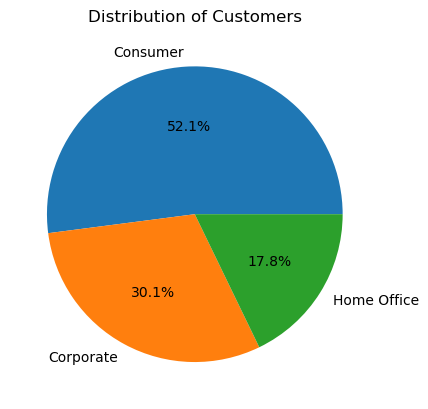

In [48]:
# Visualize the customer_segmentation using pie chart 
plt.pie(customer_segmentation['Total Customers'], labels=customer_segmentation['Customers Type'], autopct='%1.1f%%')

# Set the title of the pie chart
plt.title('Distribution of Customers')
plt.show()

In [66]:
# Find the total sales for each segment
pd.options.display.float_format = '{:.2f}'.format # Convert the scientific notation into decimal
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment': 'Customer Type', 'Sales': 'Total Sales'})
sales_per_segment

,Customer Type,Total Sales
0,Consumer,1148060.53
1,Corporate,688494.07
2,Home Office,424982.18


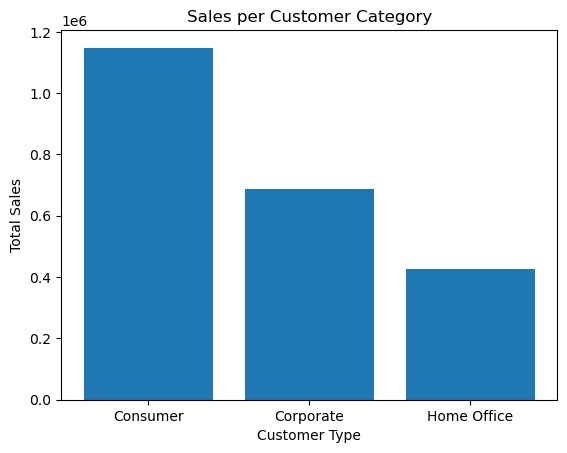

In [70]:
# Visualize the total sales for each segment using Bar Chart
plt.bar(sales_per_segment['Customer Type'], sales_per_segment['Total Sales'])

# Labels
plt.title('Sales per Customer Category')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')

plt.show()


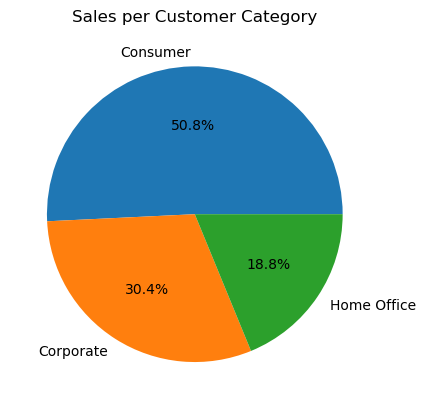

In [15]:
# Visualize the total sales(%) for each segment using Bar Chart
plt.pie(sales_per_segment['Total Sales'], labels=sales_per_segment['Customer Type'], autopct='%1.1f%%')

# Set the title of the pie chart
plt.title('Sales per Customer Category')
plt.show()

###### Customer Loyalty: Examine the repeat purchase behavior of customers 

In [81]:
# Group the data by Customer ID, Customer Name, Segments, and calculate the frequency of orders for each customer
customer_order_frequency = df.groupby(['Segment','Customer ID', 'Customer Name'])['Order ID'].count().reset_index()

# Rename the column to represent the frequency of orders
customer_order_frequency.rename(columns={'Order ID': 'Total Orders'}, inplace=True)

# Identify repeat customers (customers with order frequency greater than 1)
repeat_customers = customer_order_frequency[customer_order_frequency['Total Orders'] > 1]

# Sort "repeat_customers" in descending order based on the "Order Frequency" column
repeat_customers_sorted = repeat_customers.sort_values(by='Total Orders', ascending=False)

# Print the result- the first 15 and reset index
print(repeat_customers_sorted.head(15).reset_index()) #reset_index(drop=True) - for removing the Index column

    index      Segment Customer ID        Customer Name  Total Orders
0     405     Consumer    WB-21850        William Brown            35
1     722  Home Office    MA-17560         Matt Abelman            34
2     755  Home Office    PP-18955           Paul Prost            34
3     200     Consumer    JL-15835             John Lee            33
4      75     Consumer    CK-12205  Chloris Kastensmidt            32
5     370     Consumer    SV-20365          Seth Vernon            32
6     522    Corporate    JD-15895     Jonathan Doherty            32
7     407     Consumer    ZC-21910     Zuschuss Carroll            31
8      24     Consumer    AP-10915       Arthur Prichep            31
9     136     Consumer    EP-13915           Emily Phan            31
10    230     Consumer    LC-16870        Lena Cacioppo            30
11    150     Consumer    GT-14710            Greg Tran            29
12    690  Home Office    Dp-13240          Dean percer            29
13    437    Corpora

###### Sales by Customer: Identify top-spending customers based on their total purchase amount 

In [82]:
# Group the data by customer IDs and calculate the total purchase (sales) for each customer
customer_sales = df.groupby(['Segment','Customer ID', 'Customer Name'])['Sales'].sum().reset_index()

# Sort the customers based on their total purchase in descending order to identify top spenders
top_spenders = customer_sales.sort_values(by='Sales', ascending=False)

# Print the top-spending customers
print(top_spenders.head(10).reset_index(drop=True))

       Segment Customer ID       Customer Name    Sales
0  Home Office    SM-20320         Sean Miller 25043.05
1    Corporate    TC-20980        Tamara Chand 19052.22
2     Consumer    RB-19360        Raymond Buch 15117.34
3  Home Office    TA-21385        Tom Ashbrook 14595.62
4     Consumer    AB-10105       Adrian Barton 14473.57
5     Consumer    KL-16645        Ken Lonsdale 14175.23
6     Consumer    SC-20095        Sanjit Chand 14142.33
7     Consumer    HL-15040        Hunter Lopez 12873.30
8     Consumer    SE-20110        Sanjit Engle 12209.44
9     Consumer    CC-12370  Christopher Conant 12129.07


##### 2. Shipment Analysis based on Shipping Methods 

In [83]:
# Types of Shipping methods 
types_of_customers = df['Ship Mode'].unique()
print(types_of_customers)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [84]:
# Frequency of use of a shipping methods 
shipping_model = df['Ship Mode'].value_counts().reset_index()
shipping_model = shipping_model.rename(columns={'index':'Mode_of_Shipment', 'Ship Mode': 'Use Frequency'})
shipping_model

,Mode_of_Shipment,Use Frequency
0,Standard Class,5859
1,Second Class,1902
2,First Class,1501
3,Same Day,538


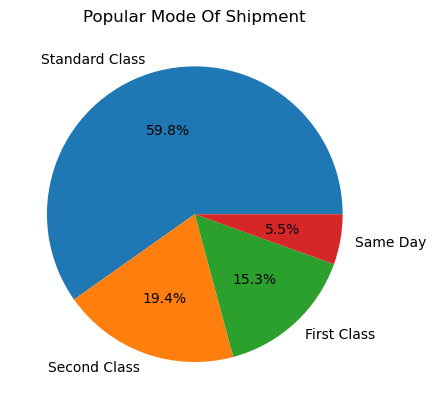

In [85]:
# Plotting a Pie chart
plt.pie(shipping_model['Use Frequency'], labels=shipping_model['Mode_of_Shipment'], autopct='%1.1f%%')

# Set the title of the pie chart
plt.title('Popular Mode Of Shipment')
plt.show()

##### 3. Customer & Sales Analysis based on Geographical Variables (Country, City, State, Region)

In [87]:
# Customers per state 
state = df['State'].value_counts().reset_index()
state = state.rename(columns={'index':'State', 'State':'Number_of_customers'})
state.head(10)

,State,Number_of_customers
0,California,1946
1,New York,1097
2,Texas,973
3,Pennsylvania,582
4,Washington,504
5,Illinois,483
6,Ohio,454
7,Florida,373
8,Michigan,253
9,North Carolina,247


In [89]:
# Customers per city 
city = df['City'].value_counts().reset_index()
city= city.rename(columns={'index':'City', 'City':'Number_of_customers'})
city.head(10)

,City,Number_of_customers
0,New York City,891
1,Los Angeles,728
2,Philadelphia,532
3,San Francisco,500
4,Seattle,426
5,Houston,374
6,Chicago,308
7,Columbus,221
8,San Diego,170
9,Springfield,161


In [91]:
# Sales per state 

# Group the data by state and calculate the total purchases (sales) for each state
state_sales = df.groupby(['State'])['Sales'].sum().reset_index()

# Sort the states based on their total sales in descending order to identify top spenders
top_sales = state_sales.sort_values(by='Sales', ascending=False)

# Print the states 
print(top_sales.head(10).reset_index(drop=True))

          State     Sales
0    California 446306.46
1      New York 306361.15
2         Texas 168572.53
3    Washington 135206.85
4  Pennsylvania 116276.65
5       Florida  88436.53
6      Illinois  79236.52
7      Michigan  76136.07
8          Ohio  75130.35
9      Virginia  70636.72


In [94]:
# Group the data by City and calculate the total purchase (sales) for each city
city_sales = df.groupby(['City'])['Sales'].sum().reset_index()

# Sort the cities based on their sales in descending order to identify top cities
top_city_sales = city_sales.sort_values(by='Sales', ascending=False)

# Print the states 
print(top_city_sales.head(10).reset_index(drop=True))

            City     Sales
0  New York City 252462.55
1    Los Angeles 173420.18
2        Seattle 116106.32
3  San Francisco 109041.12
4   Philadelphia 108841.75
5        Houston  63956.14
6        Chicago  47820.13
7      San Diego  47521.03
8   Jacksonville  44713.18
9        Detroit  42446.94


In [95]:
# Group the data by state and calculate the total purchase (sales) for each city
state_city_sales = df.groupby(['State','City'])['Sales'].sum().reset_index()

print(state_city_sales.head(10))

     State           City   Sales
0  Alabama         Auburn 1766.83
1  Alabama        Decatur 3374.82
2  Alabama       Florence 1997.35
3  Alabama         Hoover  525.85
4  Alabama     Huntsville 2484.37
5  Alabama         Mobile 5462.99
6  Alabama     Montgomery 3722.73
7  Alabama     Tuscaloosa  175.70
8  Arizona       Avondale  946.81
9  Arizona  Bullhead City   22.29


##### 4. Product Analysis (Investigate the sales performance of different product) 

In [96]:
# Types of products in the Stores 
products = df['Category'].unique()
products

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [97]:
product_subcategory = df['Sub-Category'].unique()
product_subcategory

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [98]:
# Types of sub category 
product_subcategory = df['Sub-Category'].nunique()
product_subcategory

17

In [99]:
# Group the data by product category and how many sub-category it has 
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()
# sort by ascending order
subcategory_count = subcategory_count.sort_values(by='Sub-Category', ascending=False)
# Print the states 
print(subcategory_count)

          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


In [100]:
subcategory_count_sales = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()
subcategory_count_sales

,Category,Sub-Category,Sales
0,Furniture,Bookcases,113813.20
1,Furniture,Chairs,322822.73
2,Furniture,Furnishings,89212.02
3,Furniture,Tables,202810.63
4,Office Supplies,Appliances,104618.40
5,Office Supplies,Art,26705.41
6,Office Supplies,Binders,200028.79
7,Office Supplies,Envelopes,16128.05
8,Office Supplies,Fasteners,3001.96
9,Office Supplies,Labels,12347.73


In [101]:
# Group the data by product category versus the sales from each product category 
product_category = df.groupby(['Category'])['Sales'].sum().reset_index()

# Sort the product category in their descending order and identify top product category
top_product_category = product_category.sort_values(by='Sales', ascending=False) 

# Print the states 
print(top_product_category.reset_index(drop=True))

          Category     Sales
0       Technology 827455.87
1        Furniture 728658.58
2  Office Supplies 705422.33


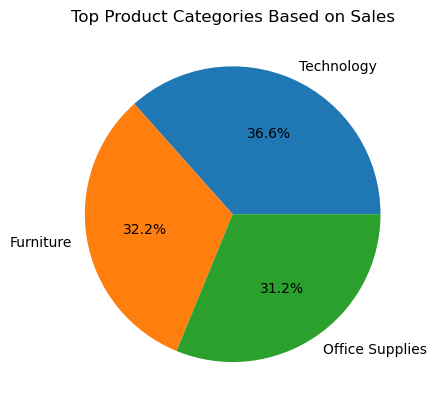

In [103]:
# Plotting a pie chart 
plt.pie(top_product_category['Sales'], labels=top_product_category['Category'], autopct='%1.1f%%')

# set the labels of the pie chart 
plt.title('Top Product Categories Based on Sales')
        
plt.show()


In [104]:
# Group the data by product sub category versus the sales  
product_subcategory = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()

# Sort the product category in their descending order and identify top product category
top_product_subcategory = product_subcategory.sort_values(by='Sales', ascending=False) 

# Print the states 
print(top_product_subcategory.reset_index(drop=True))

   Sub-Category     Sales
0        Phones 327782.45
1        Chairs 322822.73
2       Storage 219343.39
3        Tables 202810.63
4       Binders 200028.79
5      Machines 189238.63
6   Accessories 164186.70
7       Copiers 146248.09
8     Bookcases 113813.20
9    Appliances 104618.40
10  Furnishings  89212.02
11        Paper  76828.30
12     Supplies  46420.31
13          Art  26705.41
14    Envelopes  16128.05
15       Labels  12347.73
16    Fasteners   3001.96


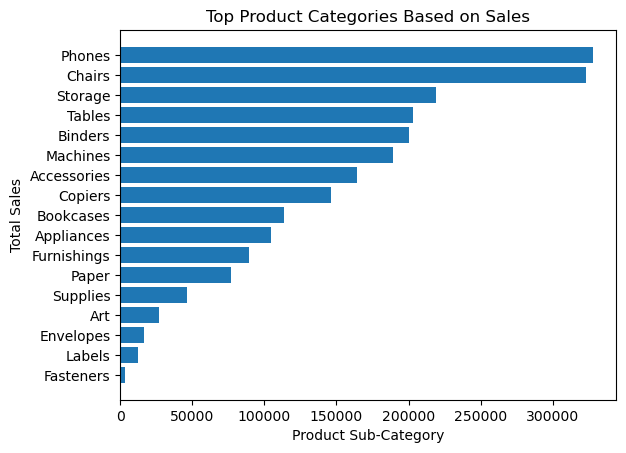

In [105]:
top_product_subcategory = top_product_subcategory.sort_values(by='Sales', ascending=True)

# Ploting a bar graph
plt.barh(top_product_subcategory['Sub-Category'], top_product_subcategory['Sales'])

# Labels
plt.title('Top Product Categories Based on Sales')
plt.xlabel('Product Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)

plt.show()


##### 5. Sales Trend Analysis 
        - Yearly
        - Last Year's  Quarterly Sales (i.e., for the Year 2018)
        - Last Year's  Monthly Sales (i.e., for the Year 2018)

In [12]:
# Yearly Sales 

# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Group the data by years and calculate the total sales amount for each year
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()

yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date': 'Year', 'Sales':'Total Sales'})

# Print the total sales for each year
print(yearly_sales)

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


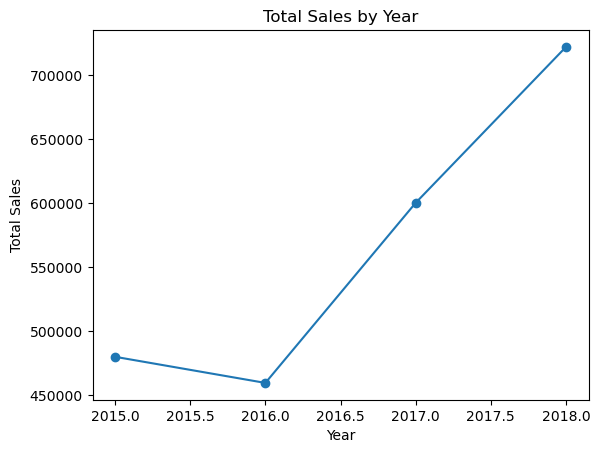

In [11]:
# Create a line graph for total sales by year
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')
plt.show()

In [13]:
# Quarterly sales for the Year 2018

# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Filter the data for the year 2018
year_sales = df[df['Order Date'].dt.year == 2018]

# Calculate the quarterly sales for 2018
quarterly_sales = year_sales.resample('Q', on='Order Date')['Sales'].sum()

quarterly_sales = quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns={'Order Date': 'Quarter', 'Sales':'Total Sales'})


print("Quarterly Sales for 2018:")
print(quarterly_sales)

Quarterly Sales for 2018:
     Quarter  Total Sales
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750


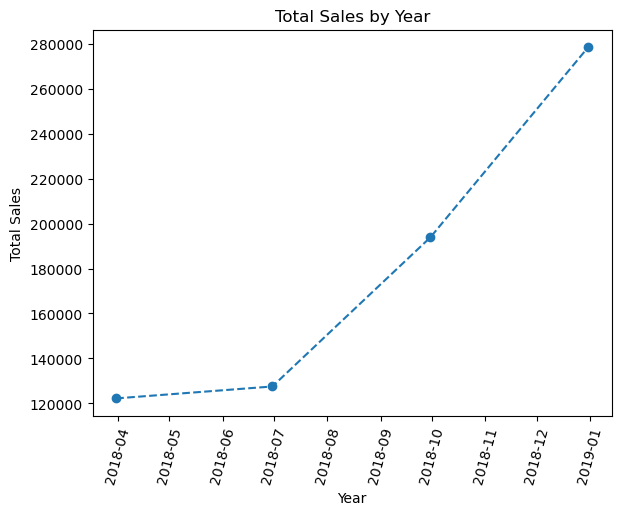

In [41]:
# Create a line graph for total sales by year
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total Sales'], marker='o', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')

# Display the plot
plt.tight_layout()
plt.xticks(rotation=75)

plt.show()

In [14]:
# Monthly sales for the year 2018

# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Filter the data for the year 2018
year_sales = df[df['Order Date'].dt.year == 2018]

# Calculate the monthly sales for 2018
monthly_sales = year_sales.resample('M', on='Order Date')['Sales'].sum()

# Renaming the columns
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns={'Order Date':'Month', 'Sales':'Total Montly Sales'})

# Print the monthly sales for 2018
print("Monthly Sales for 2018:")
print(monthly_sales)


Monthly Sales for 2018:
        Month  Total Montly Sales
0  2018-01-31          43476.4740
1  2018-02-28          19920.9974
2  2018-03-31          58863.4128
3  2018-04-30          35541.9101
4  2018-05-31          43825.9822
5  2018-06-30          48190.7277
6  2018-07-31          44825.1040
7  2018-08-31          62837.8480
8  2018-09-30          86152.8880
9  2018-10-31          77448.1312
10 2018-11-30         117938.1550
11 2018-12-31          83030.3888


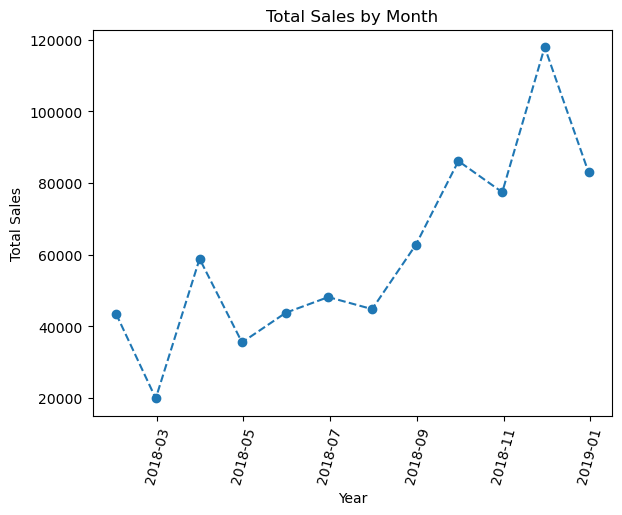

In [15]:
# Create a line graph for total sales by year
plt.plot(monthly_sales['Month'], monthly_sales['Total Montly Sales'], marker='o', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')

# Display the plot
plt.tight_layout()
plt.xticks(rotation=75)

plt.show()

## Sales Trends

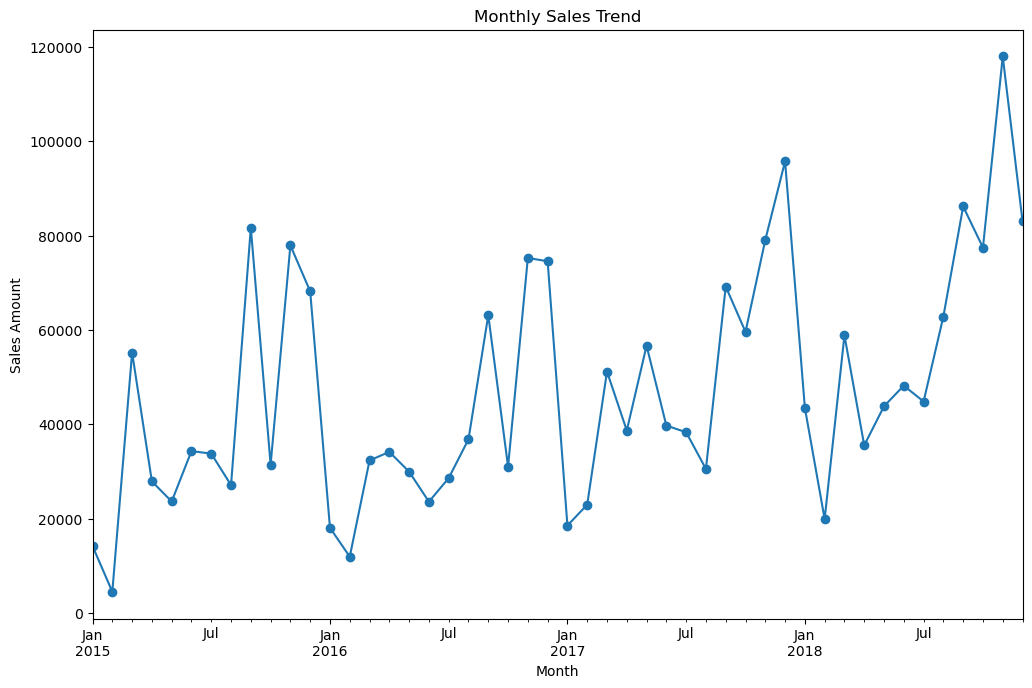

In [16]:
# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Group the data by months and calculate the total sales amount for each month
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

# Plot the sales trends for months
plt.figure(figsize=(12, 26))

# Monthly Sales Trend
plt.subplot(3, 1, 1)
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Amount')

# Adjust layout and display the plots
# plt.tight_layout()
plt.show()

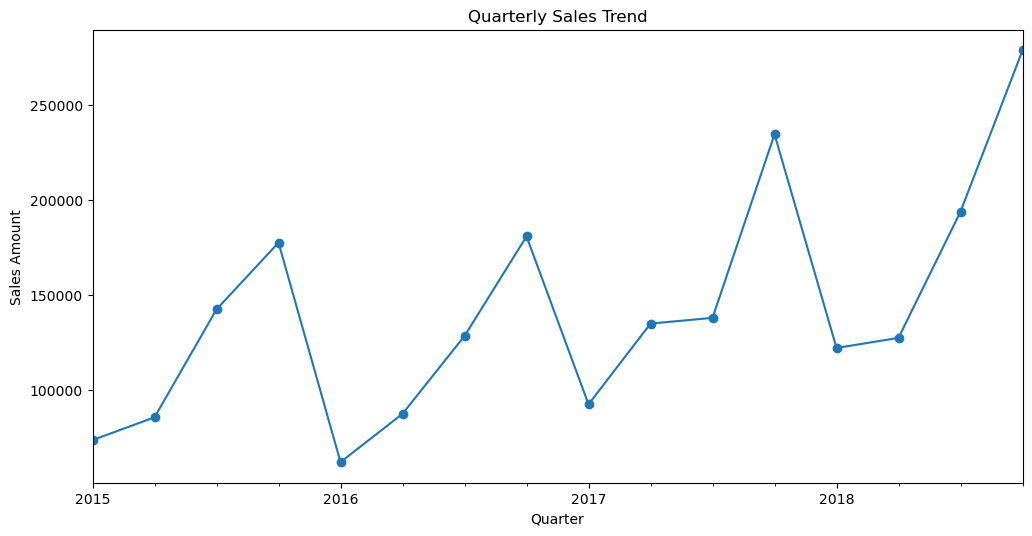

In [17]:
# Assuming you have a DataFrame named "df" with columns "Order Date" and "Sales amount"

# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Group the data by quarters and calculate the total sales amount for each quarter
quarterly_sales = df.groupby(df['Order Date'].dt.to_period('Q'))['Sales'].sum()

# Plot the sales trends for months, quarters, and years
plt.figure(figsize=(12, 20))

# Quarterly Sales Trend
plt.subplot(3, 1, 2)
quarterly_sales.plot(kind='line', marker='o')
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Sales Amount')

# Adjust layout and display the plots
#plt.tight_layout()
plt.show()

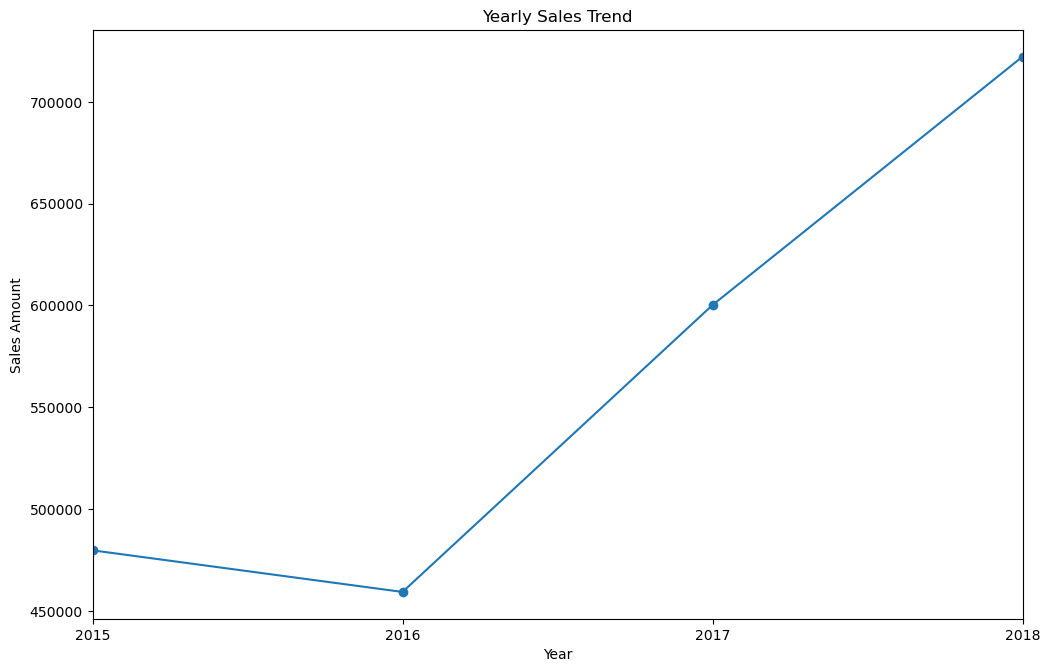

In [23]:
# Assuming you have a DataFrame named "df" with columns "Order Date" and "Sales amount"

# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Group the data by years and calculate the total sales amount for each year
yearly_sales = df.groupby(df['Order Date'].dt.to_period('Y'))['Sales'].sum()

# Plot the sales trends for quarters
plt.figure(figsize=(12, 26))

# Yearly Sales Trend
plt.subplot(3, 1, 3)
yearly_sales.plot(kind='line', marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales Amount')

# Adjust layout and display the plots

plt.show()

##### Forecasting Monthly Sales

In [54]:
# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Group the data by months and calculate the total sales amount for each month
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

# Moving Average Method
monthly_sales.rolling(window=2).mean().head()

Order Date
2015-01           NaN
2015-02     9362.7995
2015-03    29862.8445
2015-04    41556.3260
2015-05    25775.5790
Freq: M, Name: Sales, dtype: float64

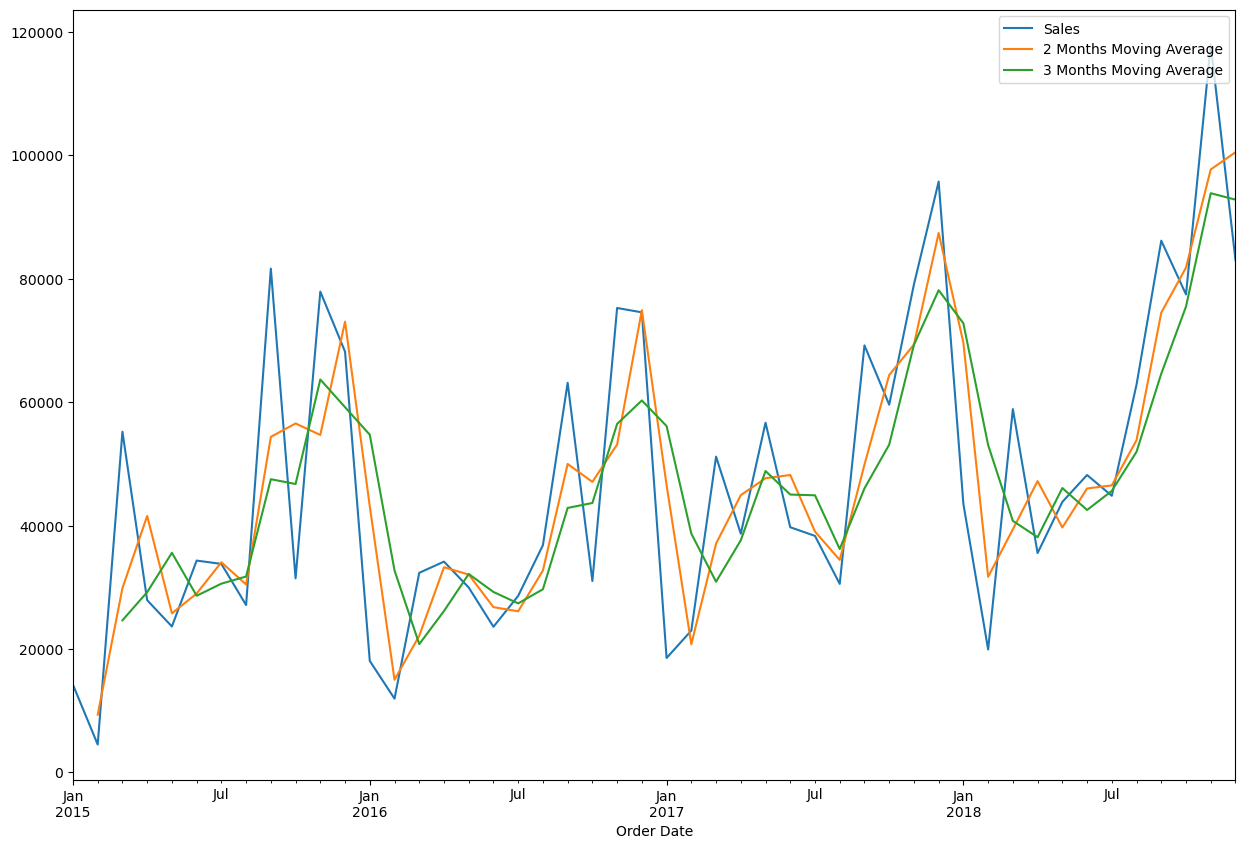

In [53]:
plt.figure(figsize=[15,10])
plt.grid(True)
monthly_sales.plot()
monthly_sales.rolling(window=2).mean().plot(kind='line')
monthly_sales.rolling(window=3).mean().plot(kind='line')
plt.legend(["Sales", "2 Months Moving Average","3 Months Moving Average"],loc=1)